### Lending Club Case Study

In [437]:
import pandas as pd,numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [438]:
#to display the entire dataframe 
pd.set_option("display.max.columns", None)

In [439]:
loan=pd.read_csv("loan.csv")
loan.shape

(39717, 111)

In [440]:
loan.head(6)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [441]:
cols=loan.columns
cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [442]:
# [print(x) for x in cols]

In [443]:
#function to find missing Value
def missing_data(loan):
    total = loan.isnull().sum()
    percent = round(100*(loan.isnull().sum()/len(loan.index)), 2)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [444]:
 missing_data(loan)

,Total,Percent
id,0,0.00
member_id,0,0.00
loan_amnt,0,0.00
funded_amnt,0,0.00
funded_amnt_inv,0,0.00
term,0,0.00
int_rate,0,0.00
installment,0,0.00
grade,0,0.00
sub_grade,0,0.00


dropping columns having more than 30 percent of missing values

In [445]:
max_number_of_nas = 12940
loan = loan.loc[:, (loan.isnull().sum() < max_number_of_nas)]
print(loan.shape)

(39717, 53)


Deletion of irrelevant data

In [446]:
## can drop below columns as all values are 0 and null values
loan['collections_12_mths_ex_med'].value_counts()
loan['chargeoff_within_12_mths'].value_counts()
loan['recoveries'].value_counts()
loan['collection_recovery_fee'].value_counts()

print(loan['id'].duplicated().any())
print(loan['member_id'].duplicated().any())
print(loan['url'].duplicated().any())
print(loan['pymnt_plan'].duplicated().any(),loan['pymnt_plan'].unique())
print(loan['initial_list_status'].duplicated().any(),loan['initial_list_status'].unique())
print(loan['application_type'].duplicated().any(),loan['application_type'].unique())
print(loan['chargeoff_within_12_mths'].duplicated().any(),loan['chargeoff_within_12_mths'].unique())
print(loan['tax_liens'].duplicated().any(),loan['tax_liens'].unique())


# ----to be checked to delete  
# 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'out_prncp', 'out_prncp_inv' 
#total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', '

                                          
loan=loan.drop(columns=['id','member_id','url','pymnt_plan','initial_list_status','purpose'])
loan=loan.drop(columns=['application_type','chargeoff_within_12_mths','tax_liens','collection_recovery_fee','total_rec_late_fee'])
loan=loan.drop(columns=['collections_12_mths_ex_med','emp_title'])
loan=loan.drop(columns=['title','zip_code','addr_state','policy_code','recoveries','last_pymnt_d','last_pymnt_amnt','installment'])


False
False
False
True ['n']
True ['f']
True ['INDIVIDUAL']
True [ 0. nan]
True [ 0. nan]


In [447]:
print(loan.shape)

(39717, 32)


Checking datatypes and sanitising data

In [448]:
loan['int_rate'] = loan['int_rate'].astype(str).apply(lambda x:x.replace("%",'')).astype(float)
print(loan['int_rate'].dtype)

loan['revol_util']=loan['revol_util'].astype(str).apply(lambda x:x.replace("%",'')).astype(float)

loan['emp_length']=loan['emp_length'].astype(str).apply(lambda x:x.rstrip(' years'))
loan['emp_length']=loan['emp_length'].astype(str).apply(lambda x:0 if x=='< 1' else x.rstrip('+'))
loan['emp_length']=loan.emp_length.astype(float)

float64


In [449]:
loan=loan.loc[~(loan.revol_util.isnull() | loan.pub_rec_bankruptcies.isnull() | loan.last_credit_pull_d.isnull())]
loan['emp_length'] = loan['emp_length'].fillna(np.ceil(loan.emp_length.median()))

missing_data(loan)
loan.shape


(38969, 32)

applying filter to find defaulted and fully paid

In [450]:
loan['defaulted_status']=loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan=loan.loc[~(loan.loan_status=='Current')]

### Univariate Analysis

In [451]:
# loan amount analysis
loan['loan_amnt'].describe()


count    37829.000000
mean     11075.671443
std       7364.035380
min        500.000000
25%       5400.000000
50%       9750.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

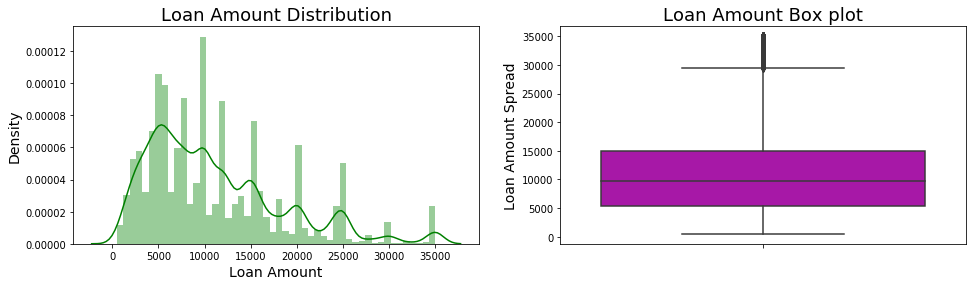

In [452]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(loan['loan_amnt'],color='g')
plt.title("Loan Amount Distribution", fontsize=18)
plt.xlabel("Loan Amount", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.subplot(1,2,2)
sns.boxplot(y=loan['loan_amnt'],color='M')
plt.title("Loan Amount Box plot", fontsize=18)
plt.ylabel("Loan Amount Spread", fontsize=14)
plt.show()


From the distribution plot it can be seen that value which is a mutiple of 5000 has sudden spikes and from the box plot it can be seen that 75% of the loan amount lies between 5000 and 15000 USD , and most representative loan amount is 10000 usd

let's check how Loan Amount effects defaulted.

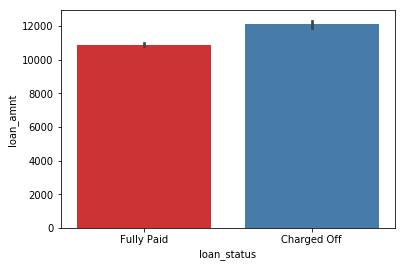

In [453]:
sns.barplot(x='loan_status',y='loan_amnt',data=loan,palette="Set1")
plt.show()

From the plot it seems like more people who borrowed more than 10000(most respresented loan amount) defaulted. 

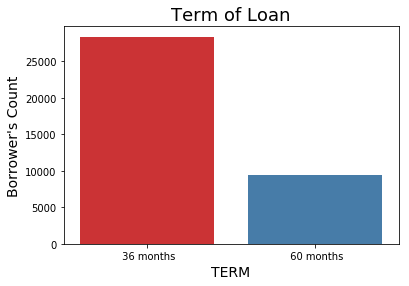

In [454]:
# term analysis
sns.countplot(loan.term, palette="Set1")
plt.title('Term of Loan',fontsize=18)
plt.xlabel('TERM',fontsize=14)
plt.ylabel("Borrower's Count",fontsize=14)
plt.show()

above plot shows most of the borrowers perfer to take 36 months to repay loan

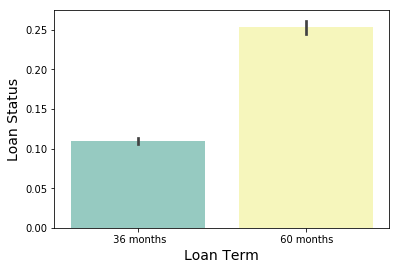

In [455]:
sns.barplot(x='term',y='defaulted_status',data=loan,palette="Set3")
plt.ylabel('Loan Status', fontsize=14)
plt.xlabel('Loan Term', fontsize=14)
plt.show()

it is clear that borrowers who applied for 60 months term are more likely to default

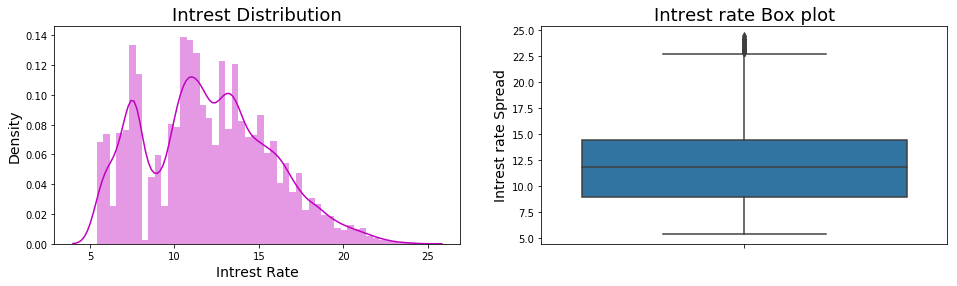

In [456]:
# intrest rate analysis
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(loan['int_rate'],color='m')
plt.title("Intrest Distribution", fontsize=18)
plt.xlabel("Intrest Rate", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.subplot(1,2,2)
sns.boxplot(y=loan['int_rate'])
plt.title("Intrest rate Box plot", fontsize=18)
plt.ylabel("Intrest rate Spread", fontsize=14)
plt.show()

from above plots we can infer that 75% of intrest rates lies between 10% and 15% , avg intrest rate is 12.5 percent

In [457]:
prcnt_defaulted = loan.loan_status.value_counts()
prcnt_defaulted = prcnt_defaulted / prcnt_defaulted.sum() * 100
prcnt_defaulted

Fully Paid     85.482038
Charged Off    14.517962
Name: loan_status, dtype: float64

From the derived column we can see that 85% of people Fully paid and 15% defaulted

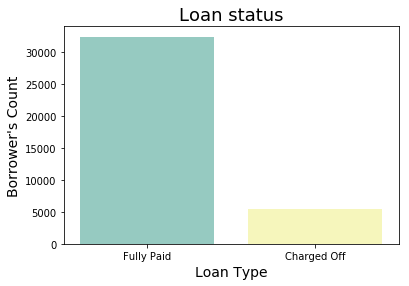

In [458]:
sns.countplot(loan.loan_status,palette='Set3')
plt.title("Loan status", fontsize=18)
plt.xlabel('Loan Type',fontsize=14)
plt.ylabel("Borrower's Count",fontsize=14)
plt.show()


Bar plot showing more than 5000 borrowers defaulted loan

In [459]:
loan['annual_inc'].describe()

count    3.782900e+04
mean     6.879496e+04
std      6.356976e+04
min      4.000000e+03
25%      4.011612e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

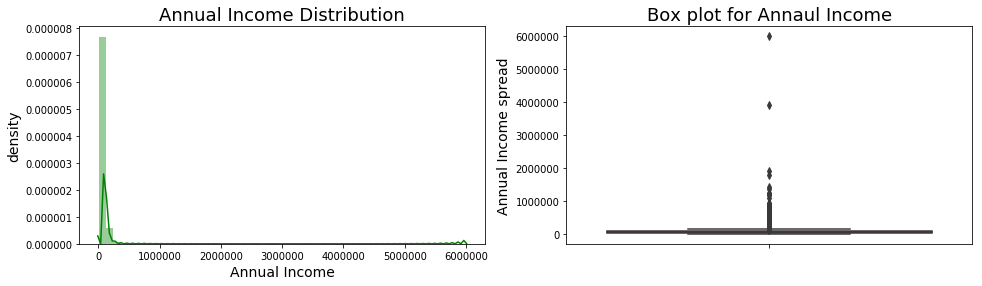

In [460]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(loan.annual_inc,color='g')
plt.title("Annual Income Distribution", fontsize=18)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.subplot(1,2,2)
sns.boxplot(y=loan.annual_inc,color='M')
plt.title("Box plot for Annaul Income", fontsize=18)
plt.ylabel("Annual Income spread", fontsize=14)
plt.show()

we could see there are outliers which are clearly effecting the analysis , let's  remove  1% of outliers and see.

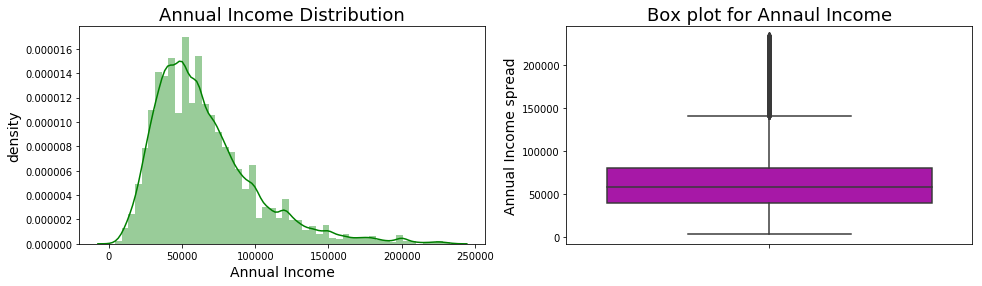

In [461]:
outliers_income=np.quantile(loan.annual_inc,.99)
loan=loan.loc[loan.annual_inc<outliers_income]
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.distplot(loan.annual_inc,color='g')
plt.title("Annual Income Distribution", fontsize=18)
plt.xlabel("Annual Income", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.subplot(1,2,2)
sns.boxplot(y=loan.annual_inc,color='M')
plt.title("Box plot for Annaul Income", fontsize=18)
plt.ylabel("Annual Income spread", fontsize=14)
plt.show()

From the above plots it is clear that 75% of the borrowers fall in the range of 0-150000 usd income slab, and most representative income of borrower is above 50000 usd

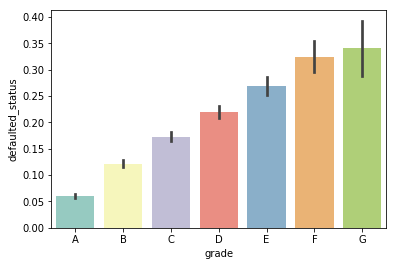

In [462]:
# grade with defaulted status
loan_sorted = loan.sort_values(['grade','sub_grade']).reset_index(drop=True)
sns.barplot(x='grade', y='defaulted_status',data=loan_sorted,palette="Set3")
plt.show()

 #### The defaulted rate increases from A to G 

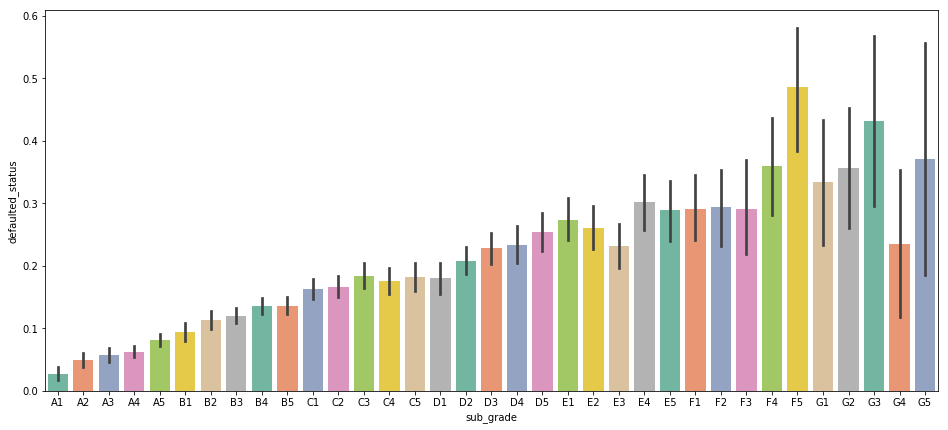

In [463]:
# subgrade with  defaulted status
plt.figure(figsize=(16,7))
sns.barplot(x='sub_grade', y='defaulted_status',data=loan_sorted,palette="Set2")
plt.show()

#### similar to grade,risk of lending money within subgrades from A to D also increases, however for the grades E , F and G though the risk increases within subgrade risk is not orderly

#### lets check defaulted status vs intrest rate

float64


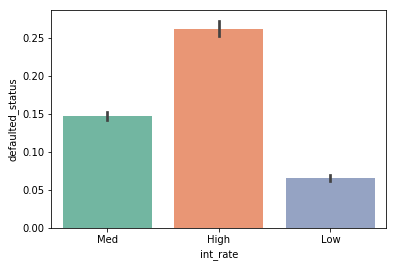

In [464]:
# creating buckets for intrest rate.dtype
loan['int_rate'] = loan['int_rate'].astype(float)
print(loan['int_rate'].dtype)
def intrst_buckets(x):
    if x<10:
        return 'Low'
    if x >=10 and x<15:
         return 'Med'
    else:
        return 'High'
loan['int_rate']=loan.int_rate.apply(lambda x:intrst_buckets(x))
loan['int_rate'].value_counts()
sns.barplot(x='int_rate', y='defaulted_status',data=loan,palette="Set2")
plt.show()

#### borrowers with medium and high intrest rate tend to default more